# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Maryam Hoseini Behbahani
2.   Student Number: 400205533


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [172]:
dataset = pd.read_csv("./data/data01.csv")


# implement the split part
# name them: x_train, x_test, y_train, y_test
#dataset = dataset.to_numpy()

train = dataset[:int(len(dataset) * 0.8)]
test = dataset[int(len(dataset) * 0.8):]

x_train = train[['X']].values

y_train = train[['Y']].values

x_test = test['X'].values

y_test = test['Y'].values

### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [173]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.
phiX = np.hstack([x_train, np.ones(x_train.shape)])
m = np.linalg.inv(phiX.T @ phiX) @ phiX.T @ y_train
m

array([[-1.02641738],
       [ 0.81500634]])

In [174]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = mean_squared_error(y_train, predicted_train_y)
test_error = mean_squared_error(y_test, predicted_test_y)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")


MSE train error: 0.32467763017774226
MSE test error: 0.3544951192130029


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

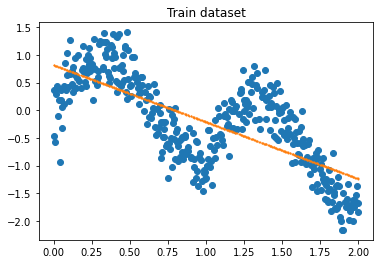

In [175]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

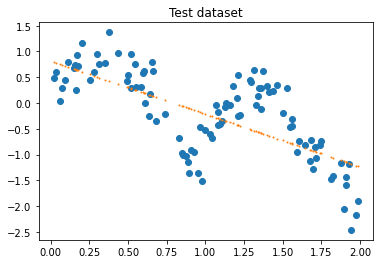

In [176]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

The reported accuracies are not acceptable and the line was not good for the dataset. 
The reason for this problem is that there was not a simple linear relationship between X and Y. So a line cannot fit the dataset appropriately.

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

Yes, because locally weighted linear regression is a non-parametric algorithm, that is, the model does not learn a fixed set of parameters as is done in ordinary linear regression. Rather parameters are computed individually for each query point x and a higher preference is given to the points in the training set lying in the vicinity of x than the points lying far away from x.

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [177]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        denominator = (-2 * hyperparameter * hyperparameter)
        
        W[i, i] = np.exp(np.dot((xi-the_query_point), (xi-the_query_point).T)/denominator)
        
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [178]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    X = np.hstack((train_X, np.ones((l, 1))))
    qx = np.mat([query_x, 1])
    
    W = get_weight_matrix(qx, X, hyperparameter)
    
    theta = np.linalg.pinv(X.T*(W * X))*(X.T*(W * train_Y))
   
    return np.dot(qx, theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [181]:
hyperparameter = 0.01
predicted_test = [predict(x_train, y_train, query, hyperparameter) for query in x_test]
predicted_test = [np.squeeze(np.asarray(i)) for i in predicted_test]
error = mean_squared_error(y_test, predicted_test)
print(f"MSE test error: {error}")

MSE test error: 0.0957544740369233


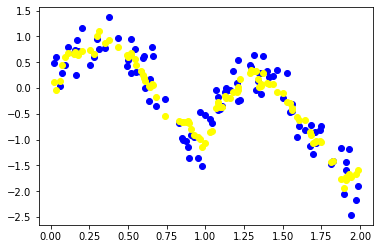

In [168]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

Yes, because higher preference is given to the points in the training set lying in the vicinity of x than the points lying far away from x.

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

I think for KNN to perform well, lots of data is needed. otherwise the points that are found as neighbours, are actually far away. 

### Part10:
Implementing the `KNN model`.

In [159]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        distance = abs(x1 - x2)
        return distance

    def return_nn_ids(self, x):
        d = []
        for x2 in self.X:
          d.append(self.distance(x,x2))
        indices = []
        for i in range(self.k):
          indices.append(min(range(len(d)), key=d.__getitem__)) 
          del d[indices[-1]]

        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        sum = 0
        for i in neareest_indices:
          sum = sum + self.Y[i]
        predicted_y = sum / self.k
        return predicted_y

In [160]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test] 
    error = mean_squared_error(y_test, predicted_y)
    return error,predicted_y

In [186]:
k = 1
error_knn,predicted_y= evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.12823046814732073


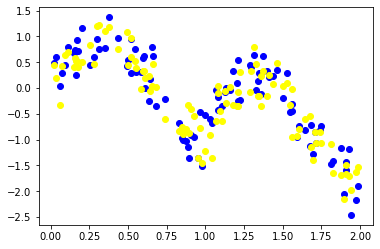

In [187]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

Test accuracy is not good. And increasing the number of nearest neighbours is not helpful. Because by increasing the number of points, they are gonna be more far away. So taking the average of them would degrade the results.